# Check your feature extraction code

using package [python_speech_features](https://github.com/jameslyons/python_speech_features)

```bash
# you can install the package
pip install python_speech_features
pip install librosa
```

# import package

In [1]:
# for preview the audio
import IPython.display as ipd
# feature package
from python_speech_features import fbank, mfcc, logfbank
import librosa
import numpy
import scipy
# plot package
import matplotlib.pyplot as plt
import matplotlib as mpl

# show the demo audio

In [2]:
ipd.Audio("./recorded_trim.wav")

# load audio by librosa

the loaded audio has been normalized (both divide (2 << 15) ),
which type is float32


In [3]:
audio, sr = librosa.load("./recorded_trim.wav",sr=16000)
import soundfile as sf
audio,sr = sf.read("./recorded_trim.wav")
audio

array([-3.05175781e-05,  0.00000000e+00,  0.00000000e+00, ...,
        3.96728516e-04,  3.96728516e-04,  3.96728516e-04])

# the raw audio

The raw audio and the normalized audio both can be used for feature extraction (perfer normalized audio)

In [4]:
raw_audio = audio * ( 2 << 15 )
# audio = raw_audio
raw_audio


array([-2.,  0.,  0., ..., 26., 26., 26.])

In [7]:
max(raw_audio)

53090.0

# the function for visualization

In [5]:

def plot_show(filter_banks_T, feat_name):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
    cax = ax.matshow(
        filter_banks_T.astype("float32"),
        interpolation="nearest",
        aspect="auto",
        cmap=plt.cm.jet,
        origin="lower",
    )
    fig.colorbar(cax)
    plt.title(feat_name)
    plt.show()

# fbank40 feature using package
you should check your result with the fbank_feats generated by package

maybe you can check the [fbank function](https://github.com/jameslyons/python_speech_features/blob/e280ac2b5797a3445c34820b0110885cd6609e5f/python_speech_features/base.py) details step by step


(299, 40)


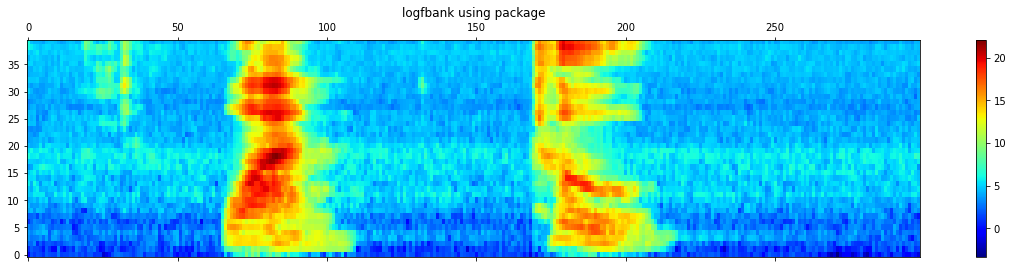

In [6]:
fbank_feats,energy = fbank(raw_audio,
                    samplerate=16000,
                    winlen=0.025,
                    winstep=0.01,
                    nfilt=40,
                    nfft=512,
                    lowfreq=0,
                    highfreq=None,
                    preemph=0.95,
                    winfunc=numpy.hamming
                )
py_logfbank = numpy.log(fbank_feats)
print(py_logfbank.shape)
plot_show(py_logfbank.T, "logfbank using package")

# the follow code use the numpy.ones for winfunc, not numpy.hamming
# py_logfbank = logfbank(audio,samplerate=16000,winlen=0.025,winstep=0.01,nfilt=40,nfft=512,lowfreq=0,highfreq=None,preemph=0.97,
#                     )
# plot_show(py_logfbank.T)

# mfcc13 using package

In [13]:
# def mfcc(signal,samplerate=16000,winlen=0.025,winstep=0.01,numcep=13,
#           nfilt=26,nfft=512,lowfreq=0,highfreq=None,preemph=0.97,ceplifter=22,appendEnergy=True):
#     """Compute MFCC features from an audio signal.

#     :param signal: the audio signal from which to compute features. Should be an N*1 array
#     :param samplerate: the samplerate of the signal we are working with.
#     :param winlen: the length of the analysis window in seconds. Default is 0.025s (25 milliseconds)    
#     :param winstep: the step between successive windows in seconds. Default is 0.01s (10 milliseconds)    
#     :param numcep: the number of cepstrum to return, default 13    
#     :param nfilt: the number of filters in the filterbank, default 26.
#     :param nfft: the FFT size. Default is 512.
#     :param lowfreq: lowest band edge of mel filters. In Hz, default is 0.
#     :param highfreq: highest band edge of mel filters. In Hz, default is samplerate/2
#     :param preemph: apply preemphasis filter with preemph as coefficient. 0 is no filter. Default is 0.97. 
#     :param ceplifter: apply a lifter to final cepstral coefficients. 0 is no lifter. Default is 22. 
#     :param appendEnergy: if this is true, the zeroth cepstral coefficient is replaced with the log of the total frame energy.
#     :returns: A numpy array of size (NUMFRAMES by numcep) containing features. Each row holds 1 feature vector.
#     """            
#     feat,energy = fbank(signal,samplerate,winlen,winstep,nfilt,nfft,lowfreq,highfreq,preemph,winfunc=numpy.hamming)
#     plot_show(  10*numpy.log(feat).T, "logfbank using package")
#     feat = numpy.log(feat)
#     feat = dct(feat, type=2, axis=1, norm='ortho')[:,:numcep]
#     if appendEnergy: feat[:,0] = numpy.log(energy) # replace first cepstral coefficient with log of frame energy
#     return feat 

(299, 13)


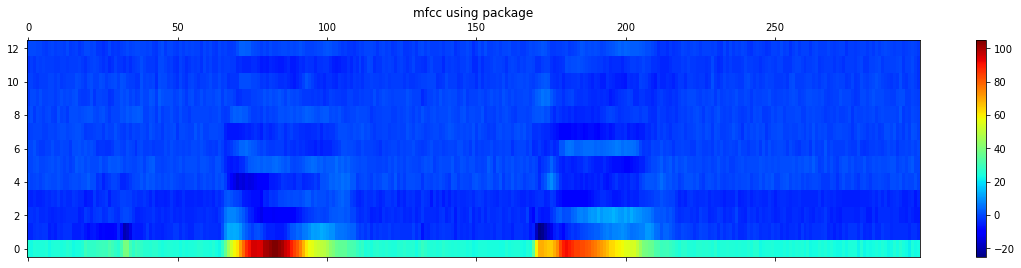

[[25.15677553 -4.36886849 -2.82470981 ... -1.00905901 -2.88447764
  -0.14543781]
 [23.29677557 -4.49871515 -2.95556648 ... -0.59833702 -0.97365103
   0.12043747]
 [25.54807521 -2.7553192  -3.24135189 ... -1.65770513 -2.27535698
   0.23522492]
 ...
 [24.57367107 -2.8522795  -4.96929369 ... -0.35461811  0.10952521
  -0.06304914]
 [23.30710599 -2.80458288 -5.65284808 ... -1.46083199 -1.31069375
  -0.8714774 ]
 [23.54857227 -4.24336655 -5.55973563 ... -2.88531693 -2.53045683
  -1.90799726]]


In [8]:
py_mfcc = mfcc(raw_audio,
               samplerate=16000,
               winlen=0.020,
               winstep=0.01,
               numcep=13,
               nfilt=40,
               nfft=512,
               lowfreq=0,
               highfreq=None,
               preemph=0.95,
               ceplifter=0,
               appendEnergy=False,
               winfunc=numpy.hamming)
print(py_mfcc.shape)
plot_show(py_mfcc.T, "mfcc using package")
print(py_mfcc)

# show the idct result for mfcc using package
There are some differences, but they are generally close

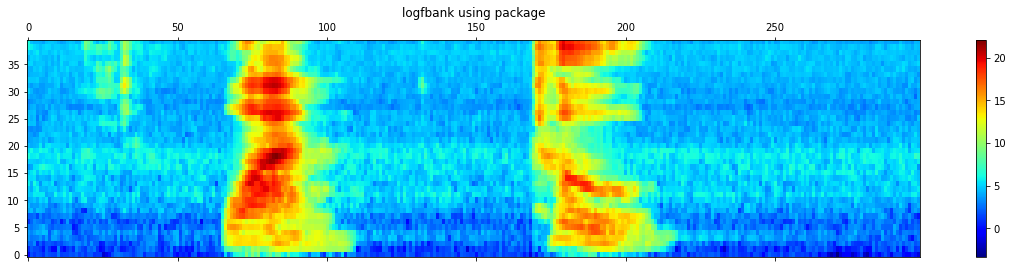

(40, 299)


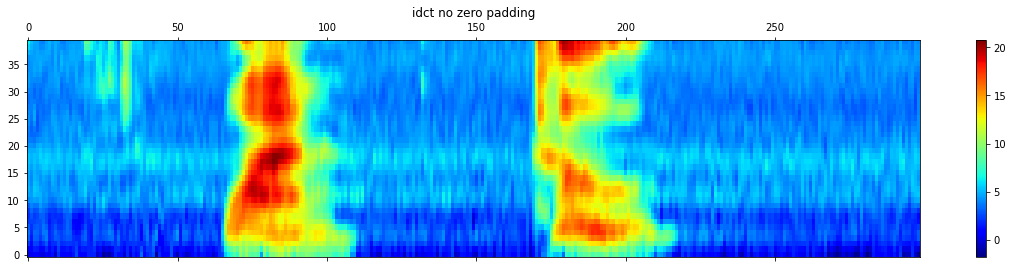

(299, 64)
(40, 299)


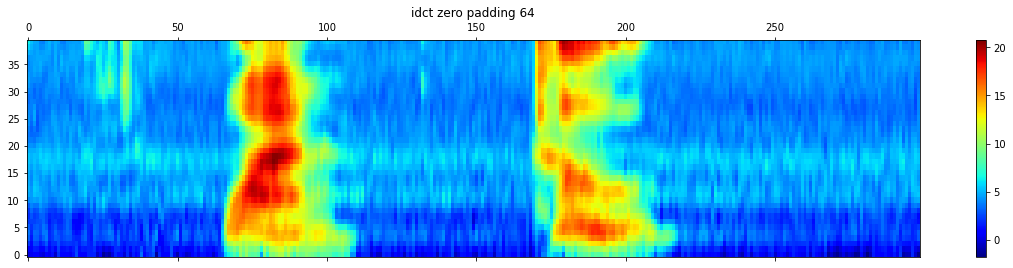

In [9]:
plot_show(py_logfbank.T, "logfbank using package")


logmel = scipy.fftpack.idct(py_mfcc.T, axis=0, type=2, norm='ortho', n=40)
print(logmel.shape)
plot_show(logmel, "idct no zero padding")

pad_py_mfcc = numpy.pad(py_mfcc,((0,0),(0,64-13)),'constant', constant_values=0) 
print(pad_py_mfcc.shape)
pad_logmel = scipy.fftpack.idct(pad_py_mfcc.T, axis=0, type=2, norm='ortho', n=40)
print(pad_logmel.shape)
plot_show(pad_logmel, "idct zero padding 64")

# mfcc from fbank using package


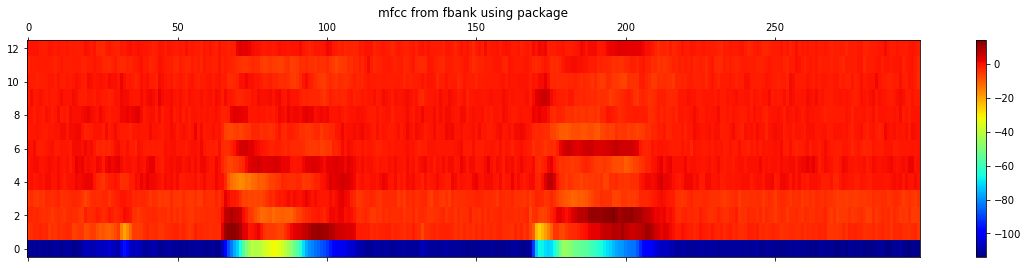

(40, 299)


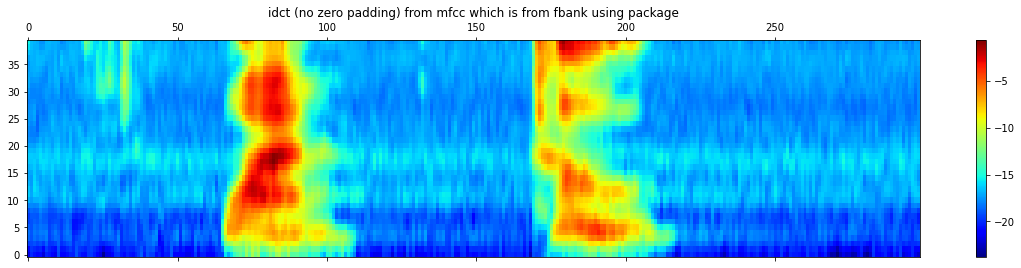

In [16]:
# py_logfbank is from the cell named "fbank40 feature using package"
py_mfcc_from_fbank = scipy.fftpack.dct(py_logfbank, type=2, axis=1, norm='ortho')[:,:13]
plot_show(py_mfcc_from_fbank.T, "mfcc from fbank using package")
feat_logmel = scipy.fftpack.idct(py_mfcc_from_fbank.T, axis=0, type=2, norm='ortho', n=40)
print(feat_logmel.shape)
plot_show(feat_logmel, r"idct (no zero padding) from mfcc which is from fbank using package")